In [1]:
import pandas as pd

In [2]:
path = "data/processed/hubs_log_data.csv"
df = pd.read_csv(path, index_col=["year", "month"])

In [10]:
df.mean().sort_values(ascending=True).head(10)

U.S._state                   0.087268
J._R._R._Tolkien             0.183344
Franklin_D._Roosevelt        0.292482
Republic_of_China            0.389214
Washington%2C_D.C.           0.521893
Scientific_classification    0.527582
George_W._Bush               0.625782
John_F._Kennedy              0.656008
Viking                       0.815776
Atlanta%2C_Georgia           0.877354
dtype: float64

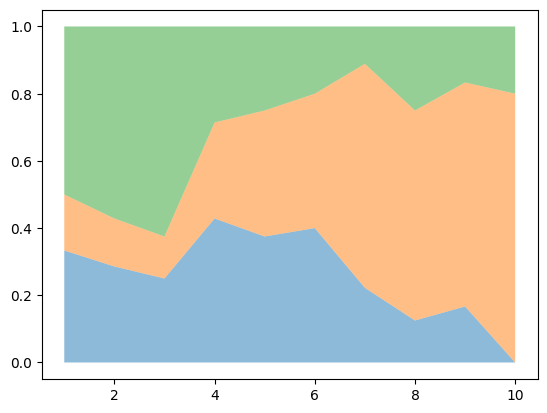

In [24]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1, 11, 1)
Y1 = np.array([2, 2, 2, 3, 3, 4, 2, 1, 1, 0])
Y2 = np.array([1, 1, 1, 2, 3, 4, 6, 5, 4, 4])
Y3 = np.array([3, 4, 5, 2, 2, 2, 1, 2, 1, 1])


def plot_proportion_over_time(category_values):
    """
    Plot the proportion of each category over time.

    Args:
        category_values : Numpy array of shape (N, M) where N is the number categories and M is the number of time points.
    """
    total = category_values.sum(axis=0)

    cumul = np.zeros_like(total)
    last_line = np.zeros_like(total)
    for i in range(len(category_values)):
        cumul += category_values[i]
        cur_line = cumul / total
        plt.fill_between(X, last_line, cumul / total, alpha=0.5)
        last_line = cur_line
    
    plt.show()

plot_proportion_over_time(np.array([Y1, Y2, Y3]))